# Ocena pandemije COVID-19

## Nalaganje podatkov

Uporabili bomo podatke o okuženih s COVID-19, ki jih zagotavlja [Center za sistemske znanosti in inženiring](https://systems.jhu.edu/) (CSSE) na [Univerzi Johns Hopkins](https://jhu.edu/). Podatkovni niz je na voljo v [tem GitHub repozitoriju](https://github.com/CSSEGISandData/COVID-19).


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

Podatke lahko naložimo neposredno iz GitHuba z uporabo `pd.read_csv`. Če podatki iz kakršnega koli razloga niso na voljo, lahko vedno uporabite kopijo, ki je lokalno shranjena v mapi `data` - samo odstranite komentar na spodnji vrstici, ki določa `base_url`:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

Vidimo, da vsaka vrstica tabele določa število okuženih posameznikov za vsako državo in/ali provinco, stolpci pa ustrezajo datumom. Podobne tabele je mogoče naložiti za druge podatke, kot so število ozdravelih in število smrti.


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## Razumevanje podatkov

Iz zgornje tabele ni jasno, kakšna je vloga stolpca province. Poglejmo si različne vrednosti, ki so prisotne v stolpcu `Province/State`:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## Predobdelava podatkov

Ne želimo razčlenjevati držav na manjša ozemlja, zato bomo najprej odstranili to razčlenitev in združili informacije za vsa ozemlja, da pridobimo podatke za celotno državo. To lahko dosežemo z uporabo `groupby`:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

Vidite, da so zaradi uporabe `groupby` vsi DataFrame-i zdaj indeksirani po Državi/Regiji. Tako lahko dostopamo do podatkov za določeno državo z uporabo `.loc`:


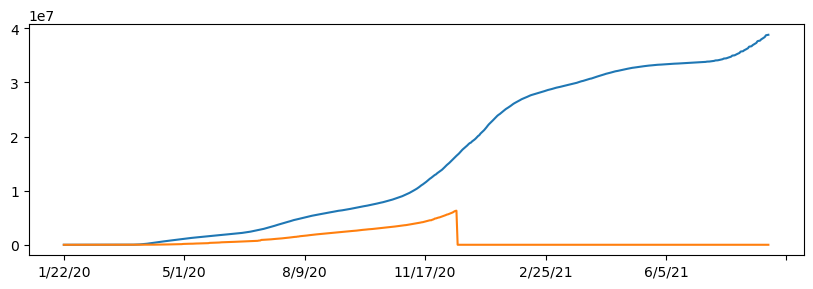

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **Opomba** kako uporabljamo `[2:]`, da odstranimo prva dva elementa zaporedja, ki vsebujeta geolokacijo države. Lahko pa tudi popolnoma odstranimo ti dve stolpci:


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## Preiskovanje podatkov

Zdaj se osredotočimo na preiskovanje določene države. Ustvarimo okvir, ki vsebuje podatke o okužbah, razvrščene po datumu:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

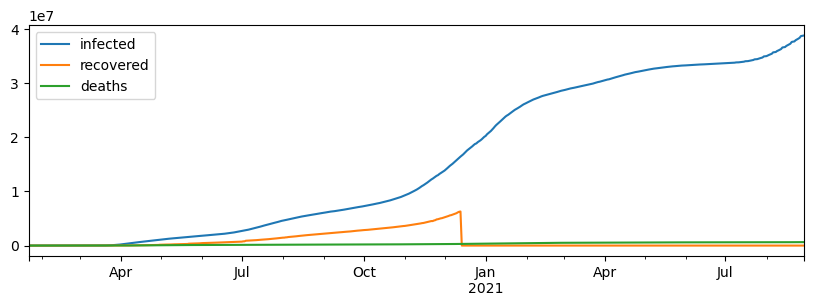

In [134]:
df.plot()
plt.show()

Zdaj izračunajmo število na novo okuženih ljudi vsak dan. To nam bo omogočilo videti hitrost napredovanja pandemije. Najlažji način za to je uporaba `diff`:


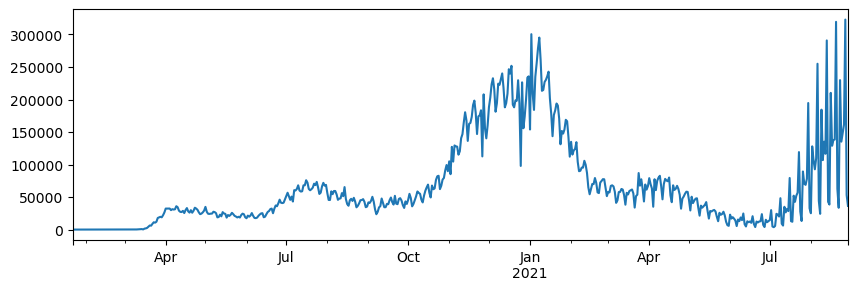

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

Vidimo lahko velike nihanja v podatkih. Poglejmo podrobneje enega od mesecev:


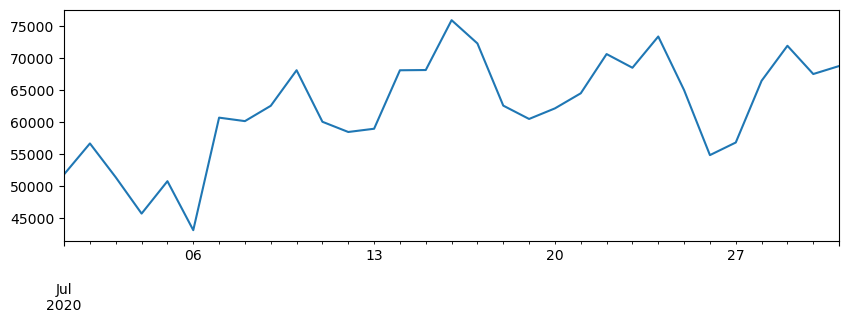

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

Zdi se, da so v podatkih tedenska nihanja. Ker želimo videti trende, je smiselno zgladiti krivuljo z izračunom drsečega povprečja (tj. za vsak dan bomo izračunali povprečno vrednost prejšnjih nekaj dni):


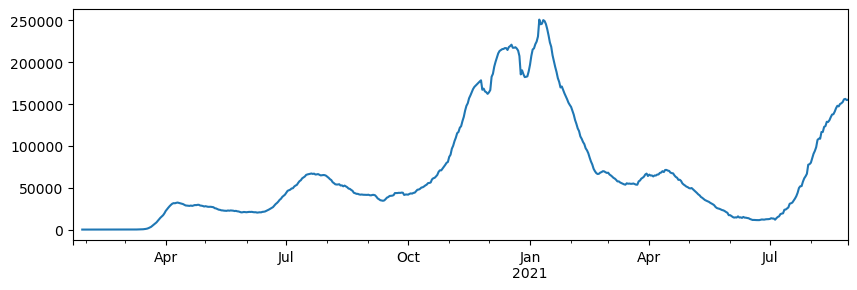

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

Da bi lahko primerjali več držav, bomo morda želeli upoštevati prebivalstvo države in primerjati odstotek okuženih posameznikov glede na prebivalstvo države. Da bi pridobili podatke o prebivalstvu držav, naložimo podatkovno zbirko držav:


In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

Ker ta podatkovni niz vsebuje informacije tako o državah kot o provincah, moramo biti nekoliko bolj iznajdljivi, da dobimo populacijo celotne države:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

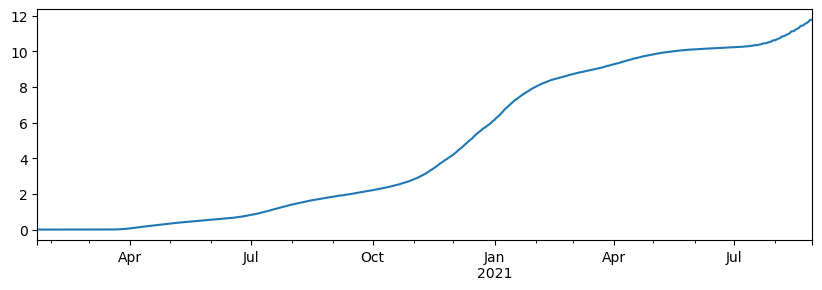

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## Izračun $R_t$

Da bi ugotovili, kako nalezljiva je bolezen, si ogledamo **osnovno reprodukcijsko število** $R_0$, ki označuje število ljudi, ki jih bo okužena oseba dodatno okužila. Ko je $R_0$ večji od 1, se epidemija verjetno širi.

$R_0$ je lastnost same bolezni in ne upošteva nekaterih zaščitnih ukrepov, ki jih ljudje lahko sprejmejo za upočasnitev pandemije. Med potekom pandemije lahko ocenimo reprodukcijsko število $R_t$ v katerem koli trenutku $t$. Pokazalo se je, da lahko to število približno ocenimo tako, da vzamemo 8-dnevno okno in izračunamo $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
kjer je $I_t$ število na novo okuženih posameznikov na dan $t$.

Izračunajmo $R_t$ za naše podatke o pandemiji. Za to bomo vzeli drseče okno osmih vrednosti `ninfected` in uporabili funkcijo za izračun zgornjega razmerja:


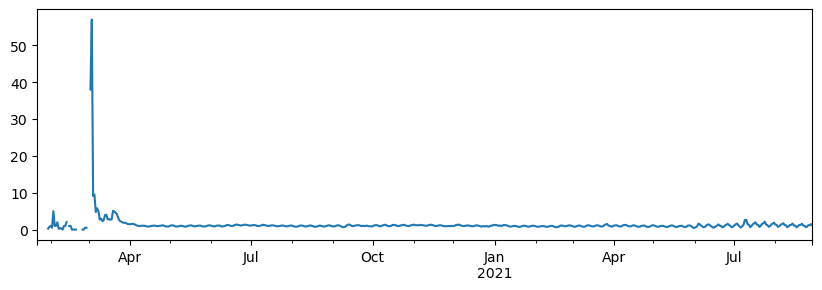

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

Vidite, da so v grafu prisotne nekatere vrzeli. Te lahko povzročijo bodisi `NaN` bodisi `inf` vrednosti v podatkovnem naboru. `inf` se lahko pojavi zaradi deljenja z 0, medtem ko `NaN` lahko nakazuje manjkajoče podatke ali odsotnost podatkov, potrebnih za izračun rezultata (na primer na samem začetku našega okvira, kjer drsno okno širine 8 še ni na voljo). Da bi graf naredili bolj prijazen za ogled, moramo te vrednosti zapolniti z uporabo funkcij `replace` in `fillna`.

Poglejmo si podrobneje začetek pandemije. Omejili bomo tudi vrednosti na y-osi, da prikažemo le vrednosti pod 6, kar bo omogočilo boljši pregled, ter narisali vodoravno črto pri vrednosti 1.


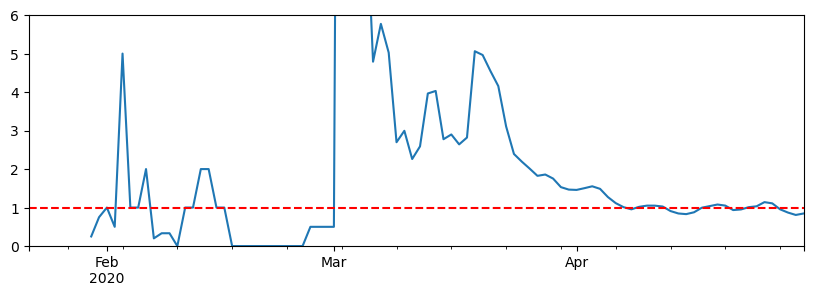

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

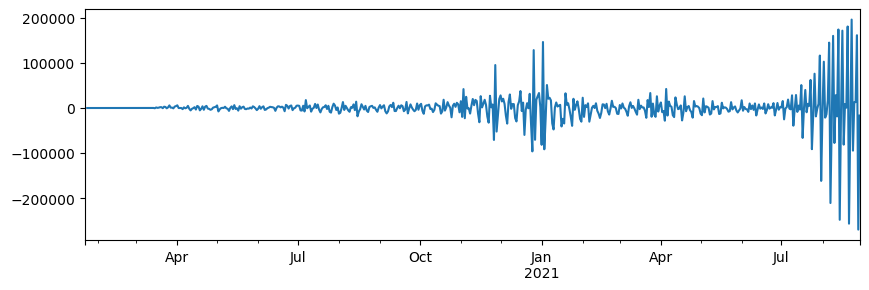

In [143]:
df['ninfected'].diff().plot()
plt.show()

Glede na dejstvo, da je v podatkih veliko nihanj zaradi poročanja, je smiselno zgladiti krivuljo z uporabo drsečega povprečja, da dobimo celotno sliko. Osredotočimo se ponovno na prve mesece pandemije:


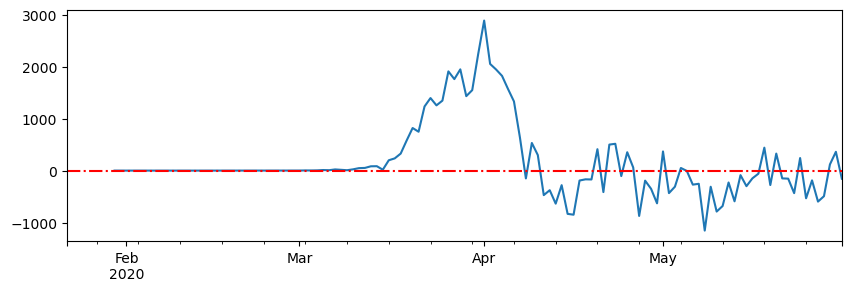

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## Izziv

Zdaj je čas, da se še bolj poigrate s kodo in podatki! Tukaj je nekaj predlogov, s katerimi lahko eksperimentirate:
* Oglejte si širjenje pandemije v različnih državah.
* Narišite grafe $R_t$ za več držav na enem grafu za primerjavo ali ustvarite več grafov drug ob drugem.
* Preverite, kako se število smrti in okrevanj povezuje s številom okuženih primerov.
* Poskusite ugotoviti, kako dolgo običajno traja bolezen, tako da vizualno primerjate stopnjo okužb in stopnjo smrti ter iščete morebitne anomalije. Morda boste morali pogledati različne države, da to ugotovite.
* Izračunajte stopnjo smrtnosti in kako se ta spreminja skozi čas. Morda boste želeli upoštevati dolžino bolezni v dnevih, da premaknete eno časovno vrsto, preden izvedete izračune.


## Reference

Za nadaljnje študije o širjenju epidemije COVID si lahko ogledate naslednje publikacije:
* [Sliding SIR Model for Rt Estimation during COVID Pandemic](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), blog objava avtorja [Dmitry Soshnikov](http://soshnikov.com)
* T.Petrova, D.Soshnikov, A.Grunin. [Estimation of Time-Dependent Reproduction Number for Global COVID-19 Outbreak](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [Koda za zgoraj omenjeno raziskavo na GitHubu](https://github.com/shwars/SlidingSIR)



---

**Omejitev odgovornosti**:  
Ta dokument je bil preveden z uporabo storitve za prevajanje z umetno inteligenco [Co-op Translator](https://github.com/Azure/co-op-translator). Čeprav si prizadevamo za natančnost, vas prosimo, da upoštevate, da lahko avtomatizirani prevodi vsebujejo napake ali netočnosti. Izvirni dokument v njegovem maternem jeziku je treba obravnavati kot avtoritativni vir. Za ključne informacije priporočamo profesionalni človeški prevod. Ne prevzemamo odgovornosti za morebitne nesporazume ali napačne razlage, ki bi nastale zaradi uporabe tega prevoda.
